# **Tree Based Algorithms** are a class of supervised machine learning models that construct decision trees to partition data into feature spaces, enabling a hierarchical representation of complex relationship between input and output labels.

##### **About the Dataset: -** Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990. **It consist of 7 columns and 1728 rows.**


In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#import decision tree
from sklearn.tree import DecisionTreeClassifier

In [8]:
# Load the dataset
df = pd.read_csv('car_evaluation.csv',  names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
# Get info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
# Check distribution of values in all columns.
cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in cols:
    print(df[col].value_counts())
    print()


buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

persons
2       576
4       576
more    576
Name: count, dtype: int64

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

safety
low     576
med     576
high    576
Name: count, dtype: int64

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64



In [11]:
# Explore class variable and get value counts of it.
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


In [12]:
# Check for Null Values
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [13]:
# Check for NA values
df.isna().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [14]:
# Split the data into target and feature variable (X,y).
X = df.drop(['class'], axis=1)
y = df['class']

In [15]:
# Split the data into training and testing datasets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
# Check shape of the dataset.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1382, 6)
(346, 6)
(1382,)
(346,)


In [17]:
# Check dtype of the data.
X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


In [18]:
# OneHot Encode the features variable
import pandas as pd
X_train_encoded = pd.get_dummies(X_train, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_test_encoded = pd.get_dummies(X_test, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [19]:
# Use Ordinal code to encode the target class to int type.
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))
y_train_encoded = y_train_encoded.ravel()
y_test_encoded = y_test_encoded.ravel()
print(y_train_encoded)
print(y_test_encoded)


[2. 2. 2. ... 0. 2. 0.]
[2. 0. 2. 0. 2. 0. 2. 2. 2. 2. 3. 0. 2. 2. 2. 2. 2. 2. 2. 0. 2. 0. 0. 2.
 0. 2. 2. 2. 2. 2. 0. 2. 2. 2. 0. 0. 1. 2. 2. 2. 2. 2. 0. 0. 0. 3. 2. 2.
 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 1. 2. 0. 2. 2. 0. 3. 2. 0. 0. 2. 2. 2.
 2. 2. 0. 3. 2. 2. 2. 2. 3. 2. 2. 0. 3. 0. 2. 0. 3. 0. 2. 1. 2. 2. 2. 1.
 2. 2. 2. 0. 2. 2. 2. 2. 0. 1. 0. 2. 2. 0. 2. 2. 2. 2. 2. 0. 1. 2. 2. 2.
 2. 1. 2. 0. 0. 2. 0. 2. 2. 2. 2. 2. 0. 2. 2. 0. 2. 3. 2. 2. 2. 0. 0. 0.
 2. 0. 2. 2. 2. 2. 0. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2.
 0. 3. 0. 2. 0. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 1. 0. 2. 2. 0. 2. 2. 2.
 0. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 0. 2. 2. 0. 2. 2. 0.
 2. 2. 2. 0. 3. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 0. 2. 2. 2.
 2. 2. 0. 3. 2. 2. 2. 0. 2. 2. 3. 2. 2. 0. 0. 2. 0. 2. 0. 0. 2. 2. 0. 1.
 3. 0. 0. 2. 2. 2. 2. 3. 0. 0. 2. 2. 2. 2. 3. 2. 2. 2. 2. 0. 2. 2. 3. 0.
 0. 2. 2. 0. 0. 0. 2. 0. 0.

In [20]:
# Print entire new encoded data
print(X_train_encoded.dtypes )
print(X_test_encoded.dtypes)


buying_high       bool
buying_low        bool
buying_med        bool
buying_vhigh      bool
maint_high        bool
maint_low         bool
maint_med         bool
maint_vhigh       bool
doors_2           bool
doors_3           bool
doors_4           bool
doors_5more       bool
persons_2         bool
persons_4         bool
persons_more      bool
lug_boot_big      bool
lug_boot_med      bool
lug_boot_small    bool
safety_high       bool
safety_low        bool
safety_med        bool
dtype: object
buying_high       bool
buying_low        bool
buying_med        bool
buying_vhigh      bool
maint_high        bool
maint_low         bool
maint_med         bool
maint_vhigh       bool
doors_2           bool
doors_3           bool
doors_4           bool
doors_5more       bool
persons_2         bool
persons_4         bool
persons_more      bool
lug_boot_big      bool
lug_boot_med      bool
lug_boot_small    bool
safety_high       bool
safety_low        bool
safety_med        bool
dtype: object


In [21]:
# print len of columns
print(len(X_train_encoded.columns))
print(len(X_test_encoded.columns))

21
21


In [22]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
# build model and fit the data.
model = DecisionTreeClassifier(random_state=42, criterion='entropy',max_depth=3)
model.fit(X_train_encoded, y_train_encoded)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [24]:
# Predict on test data
y_pred = model.predict(X_test_encoded)

In [25]:
# Check accuracy score of the model
from sklearn.metrics import accuracy_score
print("Accuracy of Decision Tree Model with Entropy as Criterion is:- ",accuracy_score(y_test_encoded, y_pred))


Accuracy of Decision Tree Model with Entropy as Criterion is:-  0.8179190751445087


In [26]:
# Compare the train set and test set accuracy
print('Training set accuracy:', model.score(X_train_encoded, y_train_encoded))
print('Test set accuracy:', model.score(X_test_encoded, y_test_encoded))

Training set accuracy: 0.8024602026049205
Test set accuracy: 0.8179190751445087


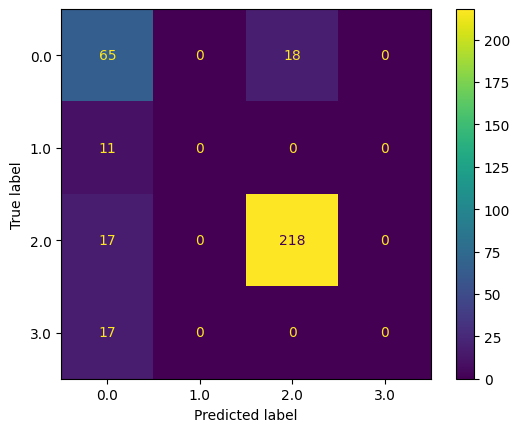

In [27]:
# Plot the curve showing train_Set and test set accuracy.
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay.from_estimator(model, X_test_encoded, y_test_encoded)
plt.show()


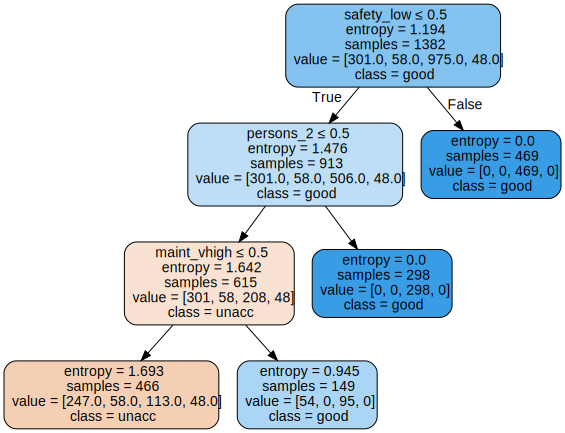

In [28]:
# plot decision tree using graphviz
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(model, out_file=None, feature_names=X_train_encoded.columns, class_names=['unacc', 'acc', 'good', 'vgood'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("car_evaluation_tree")
graph

In [29]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Build and train the model.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train_encoded)

RandomForestClassifier(random_state=42)

*   `n_estimators`: The number of trees in the forest. A higher number usually leads to better performance but also increases computation time.
*   `random_state`: For reproducibility.

In [31]:
# Evaluate the model using accuracy score.
y_pred = rf_model.predict(X_test_encoded)
print("Accuracy of Random Forest Model is:- ",accuracy_score(y_test_encoded, y_pred))


Accuracy of Random Forest Model is:-  0.953757225433526


In [32]:
# Evaluate the train and test set accuracy.
print('Training set accuracy:', rf_model.score(X_train_encoded, y_train_encoded))
print('Test set accuracy:', rf_model.score(X_test_encoded, y_test_encoded))

Training set accuracy: 1.0
Test set accuracy: 0.953757225433526


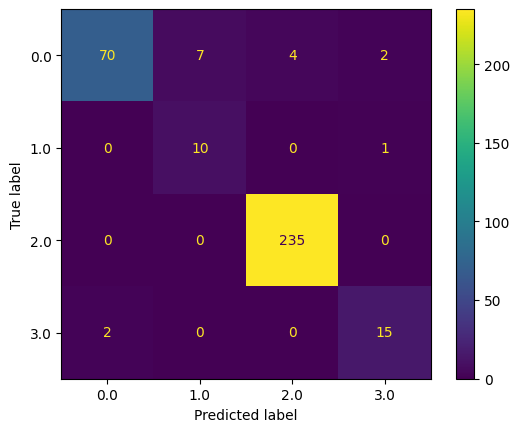

In [33]:
# Print confusion Matrix.
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay.from_estimator(rf_model, X_test_encoded, y_test_encoded)
plt.show()

In [34]:
# Import AdaBoost classifier Libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
# Define the base estimator (often a weak learner, like a shallow decision tree)
# You can experiment with different max_depth for the base estimator
base_estimator = DecisionTreeClassifier(max_depth=10, random_state=42)


In [36]:
# Create an AdaBoost Classifier instance
# You can tune n_estimators and learning_rate
adaboost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, learning_rate=1.0, random_state=42)

# Train the AdaBoost model
adaboost_model.fit(X_train_encoded, y_train_encoded)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                    random_state=42),
                   n_estimators=100, random_state=42)

In [37]:
# Make predictions
y_pred_adaboost = adaboost_model.predict(X_test_encoded)

In [38]:

# Evaluate the AdaBoost model
print("AdaBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_adaboost))
print("\nAdaBoost Classification Report:\n", classification_report(y_test_encoded, y_pred_adaboost))
print("\nAdaBoost Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_adaboost))

AdaBoost Accuracy: 0.9739884393063584

AdaBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96        83
         1.0       0.62      0.91      0.74        11
         2.0       1.00      1.00      1.00       235
         3.0       0.88      0.88      0.88        17

    accuracy                           0.97       346
   macro avg       0.87      0.93      0.89       346
weighted avg       0.98      0.97      0.98       346


AdaBoost Confusion Matrix:
 [[ 77   5   0   1]
 [  0  10   0   1]
 [  0   0 235   0]
 [  1   1   0  15]]


In [39]:
# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [40]:
# Create a Gradient Boosting Classifier instance
# You can tune n_estimators, learning_rate, max_depth, etc.
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [41]:
# Train the Gradient Boosting model
gradient_boosting_model.fit(X_train_encoded, y_train_encoded)



GradientBoostingClassifier(random_state=42)

In [42]:
# Make predictions
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test_encoded)
y_pred_gradient_boosting

array([2., 1., 2., 0., 2., 0., 2., 2., 2., 2., 3., 0., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 0., 0., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2.,
       0., 1., 1., 2., 2., 2., 2., 2., 0., 0., 0., 0., 2., 2., 2., 2., 2.,
       2., 0., 2., 2., 2., 2., 2., 2., 1., 2., 0., 2., 2., 0., 3., 2., 0.,
       0., 2., 2., 2., 2., 2., 0., 1., 2., 2., 2., 2., 3., 2., 2., 2., 3.,
       0., 2., 0., 1., 0., 2., 1., 2., 2., 2., 1., 2., 2., 2., 0., 2., 2.,
       2., 2., 1., 1., 0., 2., 2., 0., 2., 2., 2., 2., 2., 0., 1., 2., 2.,
       2., 2., 3., 2., 0., 0., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 0.,
       2., 3., 2., 2., 2., 0., 0., 0., 2., 0., 2., 2., 2., 2., 0., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 0., 2., 0., 3.,
       0., 2., 0., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2., 1., 0., 2.,
       2., 0., 2., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 1., 2., 0., 2., 2., 0., 2., 2., 0., 2., 2., 2., 0., 3.,
       2., 2., 0., 2., 2.

In [43]:
# Evaluate the Gradient Boosting model
print("Gradient Boosting Accuracy:", accuracy_score(y_test_encoded, y_pred_gradient_boosting))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test_encoded, y_pred_gradient_boosting))
print("\nGradient Boosting Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_gradient_boosting))

Gradient Boosting Accuracy: 0.9624277456647399

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.89      0.94        83
         1.0       0.53      0.91      0.67        11
         2.0       0.99      1.00      1.00       235
         3.0       0.93      0.82      0.88        17

    accuracy                           0.96       346
   macro avg       0.86      0.91      0.87       346
weighted avg       0.97      0.96      0.97       346


Gradient Boosting Confusion Matrix:
 [[ 74   7   2   0]
 [  0  10   0   1]
 [  0   0 235   0]
 [  1   2   0  14]]


In [44]:
! pip install xgboost

In [45]:
# Import xgBoost library
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
# Create an XGBoost Classifier instance
# You can tune n_estimators, learning_rate, max_depth, subsample, colsample_bytree, etc.
# Note: XGBoost uses slightly different parameter names
xgb_model = xgb.XGBClassifier(objective='multi:softmax', # For multiclass classification
                              num_class=len(set(y_train_encoded)), # Number of classes
                              n_estimators=100,
                              learning_rate=0.1,
                              max_depth=3,
                              random_state=42,
                              use_label_encoder=False, # To avoid a deprecation warning
                              eval_metric='mlogloss') # Evaluation metric


In [47]:
%magic
# Train the XGBoost model
xgb_model.fit(X_train_encoded, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=4, num_parallel_tree=None, ...)

In [48]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test_encoded)

In [49]:
# Evaluate the XGBoost model
print("XGBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test_encoded, y_pred_xgb))
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_xgb))

XGBoost Accuracy: 0.953757225433526

XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.86      0.90        83
         1.0       0.47      0.82      0.60        11
         2.0       0.99      1.00      1.00       235
         3.0       0.94      0.88      0.91        17

    accuracy                           0.95       346
   macro avg       0.84      0.89      0.85       346
weighted avg       0.96      0.95      0.96       346


XGBoost Confusion Matrix:
 [[ 71  10   2   0]
 [  1   9   0   1]
 [  0   0 235   0]
 [  2   0   0  15]]
